# Text Classification of Movie Reviews 

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df['label'].unique()

array(['neg', 'pos'], dtype=object)

Checking to see if there are any missing values in the dataframe

In [5]:
df.isna().sum()

label      0
review    35
dtype: int64

Removing any reviews that are NaN

In [6]:
df = df.dropna()

Checking to see if any reviews are blank strings and not just NaN

In [7]:
df = df[~df['review'].str.isspace()]

In [8]:
df[df['review'].apply(lambda review: review=='')]

,label,review


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


Confirming the value counts per label

In [10]:
df.groupby('label').count()

,review
label,
neg,969
pos,969


## EDA on Bag of Words

Using a CountVectorizer model to get the top 20 words (that are not english stop words) per label type

In [11]:
X = df['review']
y = df['label']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
count_vect = CountVectorizer(stop_words='english')

matrix = count_vect.fit_transform(X[y=='neg'])
freqs = zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [14]:
matrix = count_vect.fit_transform(X[y=='pos'])
freqs = zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


Spliting the data into features and a label (X and y)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Model selection

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer(stop_words='english')

In [19]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [20]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [21]:
log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [22]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [23]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

c:\Users\user\Desktop\Github_repositories\Python_for_Machine_Learning_and_Data_Science_Masterclass_Course_Projects\venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [25]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay(confusion_matrix(y_test, preds)).plot()

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



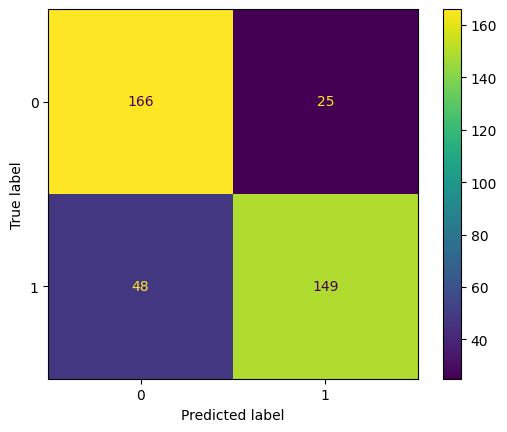

In [26]:
report(nb)

              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



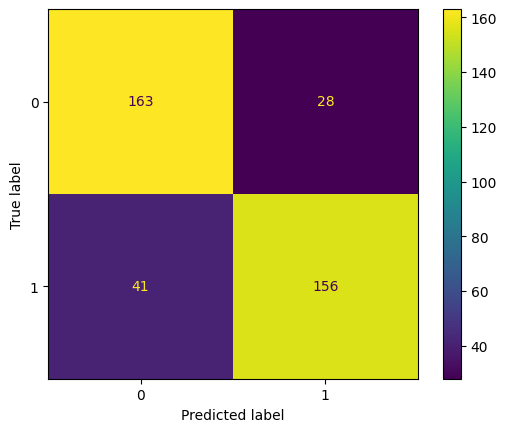

In [27]:
report(log_model)

              precision    recall  f1-score   support

         neg       0.81      0.84      0.83       191
         pos       0.84      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



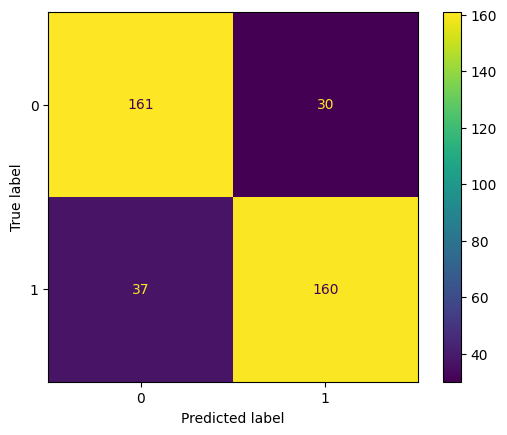

In [28]:
report(rbf_svc)

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



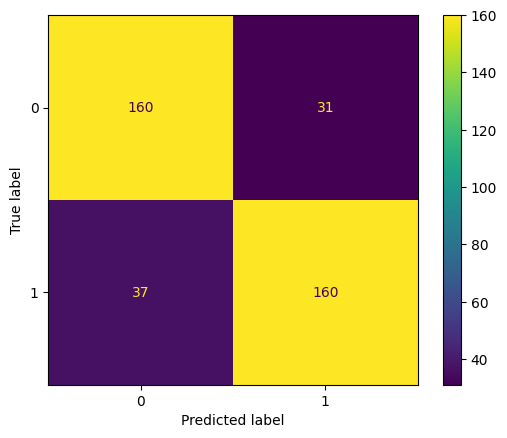

In [29]:
report(linear_svc)

The best model is rbf_svc

### Training a Mode

Creating a PipeLine that will both create a TF-IDF Vector out of the raw text data and the best model

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [32]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])